# Pymaceuticals Pre-clinical Analysis Report:

Note 1:  I miss read the directions and performed the analysis for all the treatments.  If I had selected for just the (Capomulin, Infubinol, Ketapril, and Placebo) treatments here is how i would have performed the data munging.  1-Set the index to the Drug column df.set_index['drug', inplace=true] 2-select the index for the treatments of interest using df.loc[] or df.filter(). the rest of the analysis would be the same.

Note 2:  Statistical significance will be discussed in this analysis.  The statistical test used was a visual comparison of the Confidence interval overlaps.  confidence intervals of the mean were calculated using 10,000 bootstraps (sampling with replacement) from which the a sample mean was calculated for each bootstrap.  The confidence intervals were then calculated off of the bootstraped means.  If the confidence intervals do not overlap then the two distributions can be said to have a statistically significant difference of p=0.05.  This test is aproximately equivalent to the student t-test.
 
## Analysis:

1. Over all most of the test treatments showed little effect compared to Placebo.
2. Two drugs show significant results: Capomulin and Ramicane
3. While most treatments showed an over all increase in tumor size while Capomulin and Ramicane showed a decrease in tumor size.
3. Capomulin and Ramicane also showed a significantly lower number of metastatic sites compared to placebo. It should be noted that Stelasyn also showed significantly lower number of sites as well.
4. The survival rates for Capomulin and Ramicane were higher compared to placebo and other treatments.
5. The percent change of the of Capomulin was a 19.48% decrease in tumor size and Ramicane showed a 18.51% decrease in tumor size.  All other treatments showed an increase in tumor size with the maximum increase being ketapril with and increase of 57.03% and the minimum increase was Propriva with an increase of 40.91%.
6. Over all Capomulin and Ramicane showed significant improvements from other treatments however they showed no significant difference between the two. Therefor it is concluded that Capomulin and Ramicane are equivalent in treatment efficacy.

## Recomendations:

1. Capomulin and Ramicane should proceed to the next stage of testing.
2. All other drugs should be shelved or put up for drug repurposing trials.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns
import numpy as np

In [2]:
# create path variables
path_clinical = 'raw_data/clinicaltrial_data.csv'
path_drug = 'raw_data/mouse_drug_data.csv'
#load csv into dataframes
clinical_df = pd.read_csv(path_clinical)
drug_df = pd.read_csv(path_drug)

In [3]:
clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
clinical_df.size

7572

In [5]:
drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
drug_df.size

500

In [7]:
drug_response_df = clinical_df.merge(drug_df, on='Mouse ID')
drug_response_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [8]:
rx_rsp = drug_response_df.set_index(['Drug', 'Timepoint'])
rx_rsp = rx_rsp['Tumor Volume (mm3)'].to_frame()
rx_rsp.reset_index(level=1, inplace=True)
rx_rsp.reset_index(inplace=True)
rx_rsp.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,45.651331
2,Capomulin,10,43.270852
3,Capomulin,15,43.784893
4,Capomulin,20,42.731552


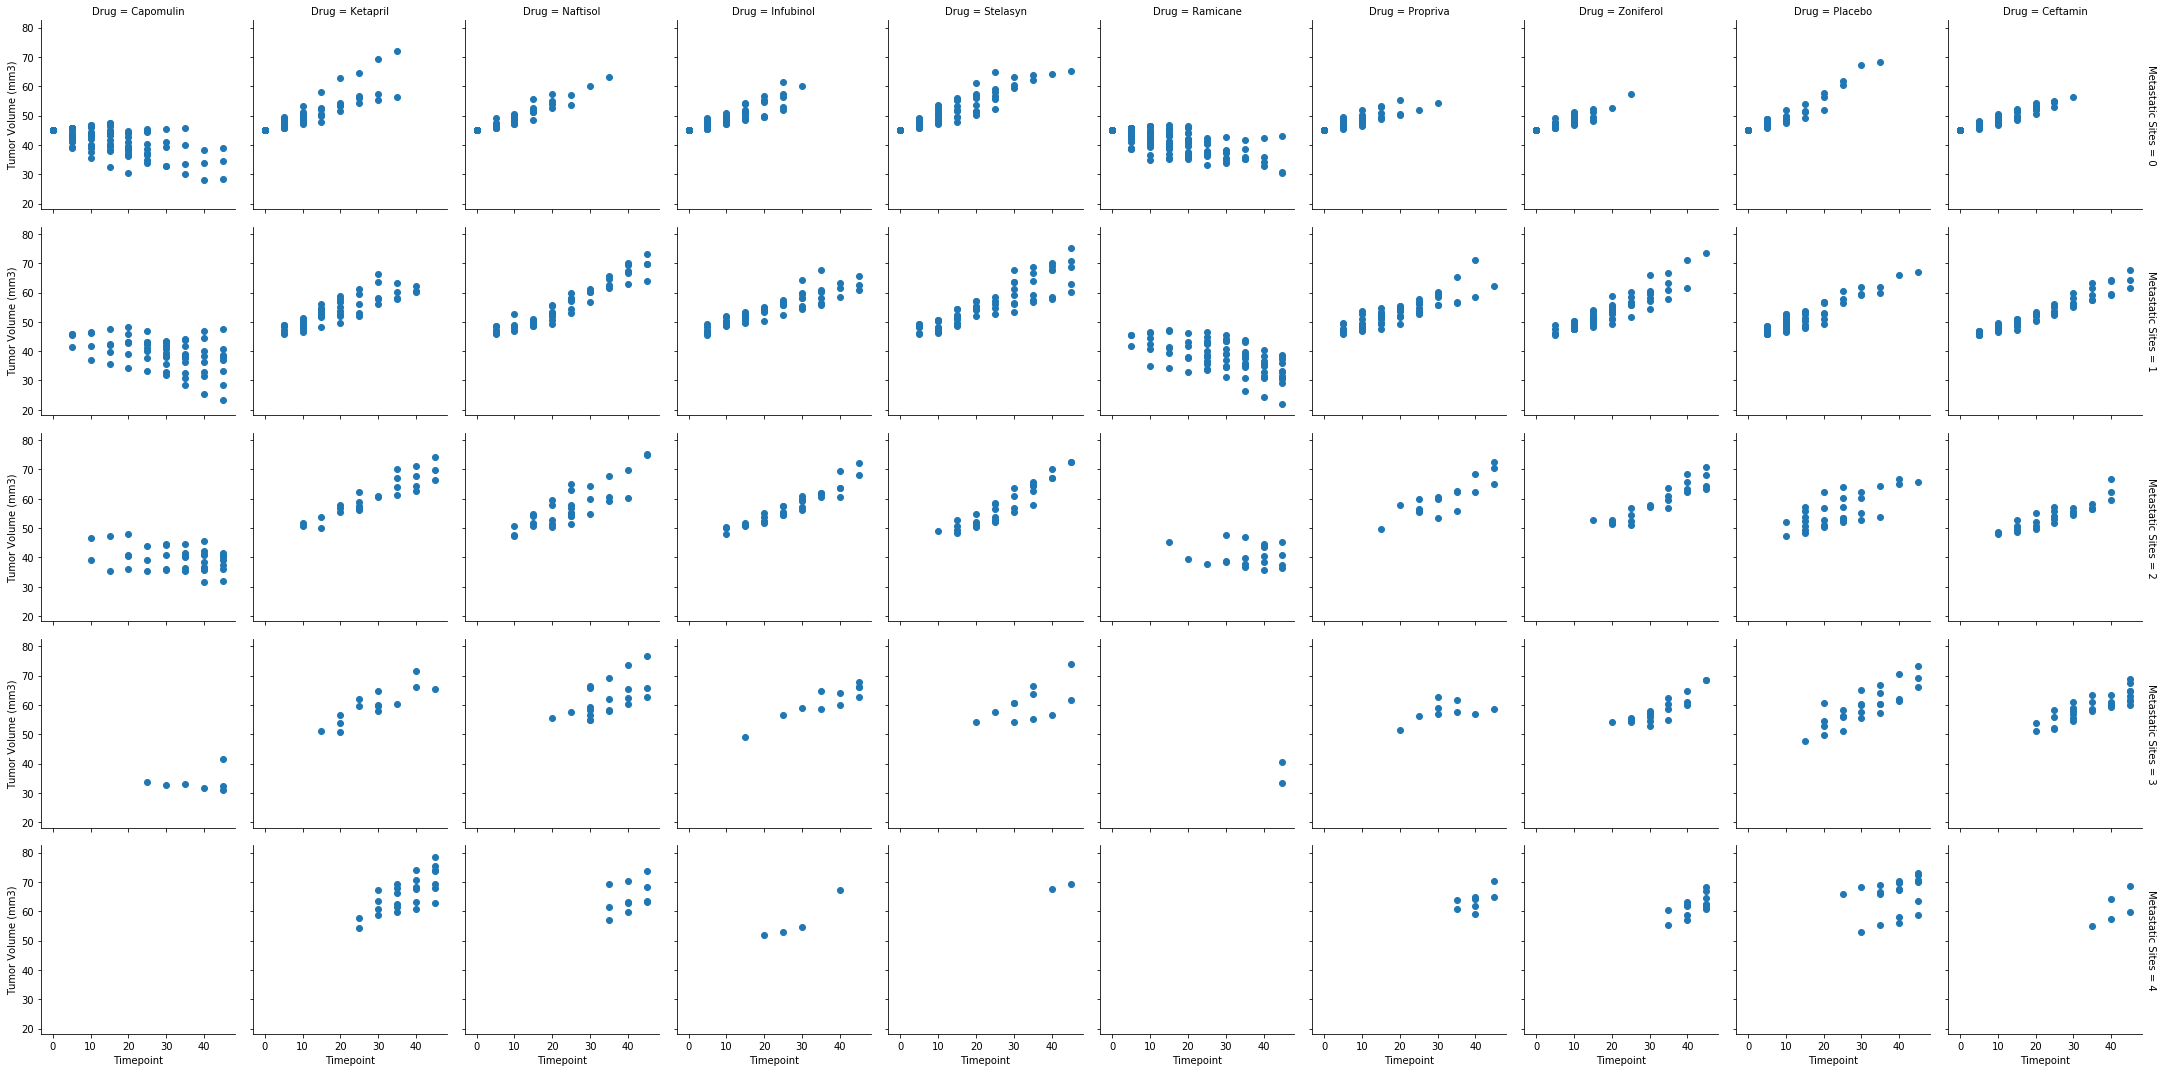

In [9]:

g = sns.FacetGrid(drug_response_df, col='Drug', row='Metastatic Sites', margin_titles=True, sharey=True, sharex=True)
g = g.map(plt.scatter, "Timepoint", "Tumor Volume (mm3)")


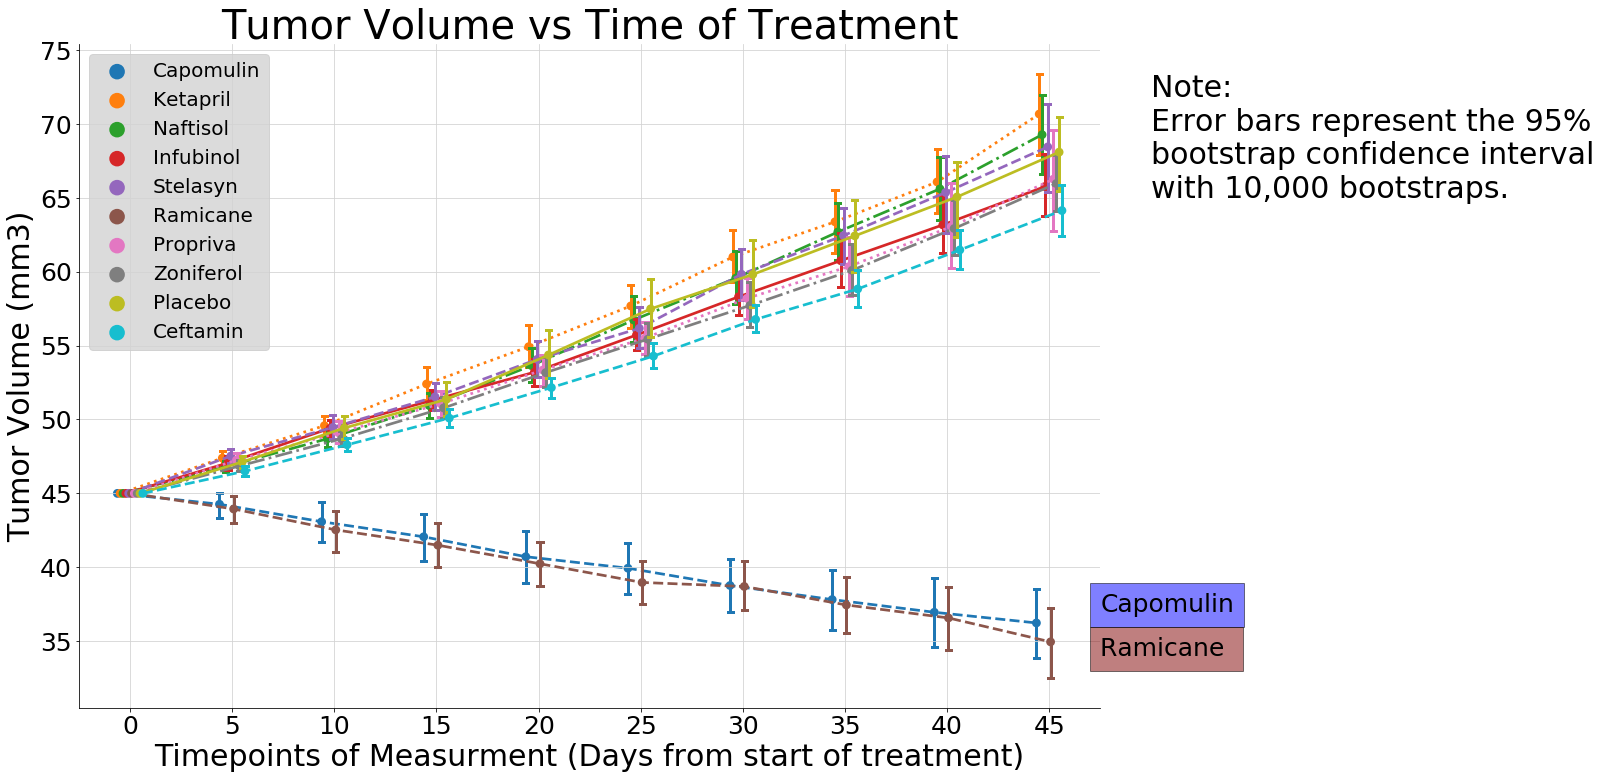

In [10]:
g2 = sns.factorplot(x='Timepoint',
                   y='Tumor Volume (mm3)',
                   hue='Drug',
                   data=drug_response_df,
                   size=10,
                   aspect=1.5,
                   ci=95,
                   n_boot=10000,
                   legend=False,
                   errwidth=3,
                   capsize=.05,
                   dodge=True,
                   linestyles=['--',':','-.','-','--','--',':','-.','-','--']
                  )
ax = g2.ax
ax.text(10,65,'Note: \nError bars represent the 95% \nbootstrap confidence interval \nwith 10,000 bootstraps.').set_fontsize(30)
ax.text(9.5,37, 'Capomulin', bbox=dict(facecolor='blue', alpha=.5)).set_fontsize(25)
ax.text(9.5,34, 'Ramicane ', bbox=dict(facecolor='maroon', alpha=.5)).set_fontsize(25)
ax.legend(loc='upper left', fontsize=20, markerscale=2, frameon=True, facecolor='lightgrey')
ax.set_title('Tumor Volume vs Time of Treatment').set_fontsize(40)
ax.grid(color='lightgrey')
ax.set_xlabel('Timepoints of Measurment (Days from start of treatment)').set_fontsize(30)
ax.set_ylabel('Tumor Volume (mm3)').set_fontsize(30)
ax.tick_params(which='major', labelsize=25)
ax.set_facecolor("white")
g.savefig('tumor_vol.png')

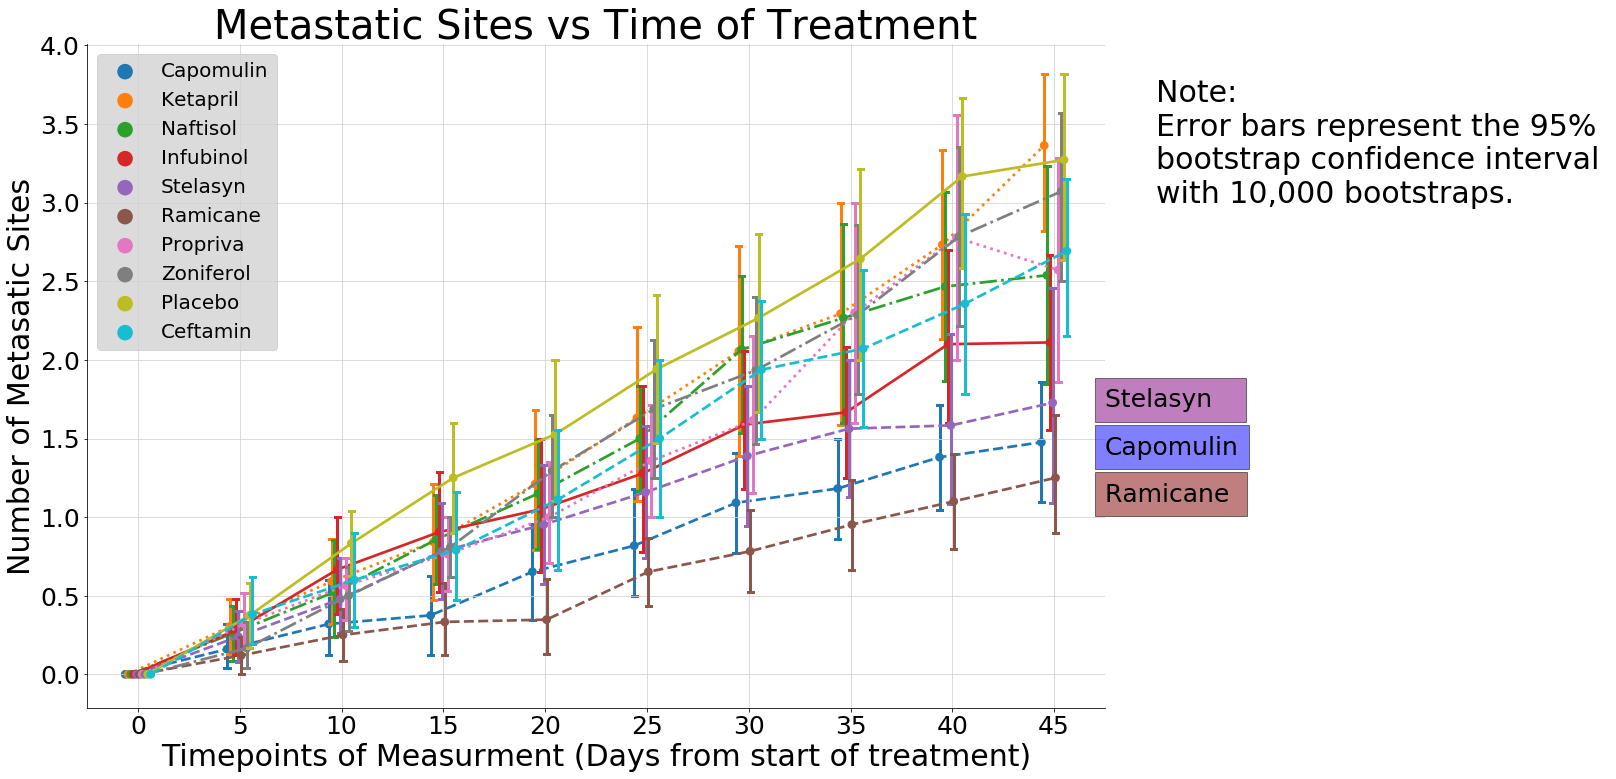

In [11]:
g1 = sns.factorplot(x='Timepoint',
                   y='Metastatic Sites',
                   hue='Drug',
                   data=drug_response_df,
                   size=10,
                   aspect=1.5,
                   ci=95,
                   n_boot=10000,
                   legend=False,
                   errwidth=3,
                   capsize=.05,
                   dodge=True,
                   linestyles=['--',':','-.','-','--','--',':','-.','-','--']
                  )
ax1 = g1.ax
ax1.text(10,3,'Note: \nError bars represent the 95% \nbootstrap confidence interval \nwith 10,000 bootstraps.').set_fontsize(30)
ax1.text(9.5,1.4, 'Capomulin', bbox=dict(facecolor='blue', alpha=.5)).set_fontsize(25)
ax1.text(9.5,1.1, 'Ramicane ', bbox=dict(facecolor='maroon', alpha=.5)).set_fontsize(25)
ax1.text(9.5,1.7, 'Stelasyn   ', bbox=dict(facecolor='purple', alpha=.5)).set_fontsize(25)
ax1.legend(loc='upper left', fontsize=20, markerscale=2, frameon=True, facecolor='lightgrey')
ax1.set_title('Metastatic Sites vs Time of Treatment').set_fontsize(40)
ax1.grid(color='lightgrey')
ax1.set_xlabel('Timepoints of Measurment (Days from start of treatment)').set_fontsize(30)
ax1.set_ylabel('Number of Metasatic Sites').set_fontsize(30)
ax1.tick_params(which='major', labelsize=25)
ax1.set_facecolor("white")
g1.savefig('metastatic_sites.png')

In [12]:
indexed_response_df = drug_response_df.set_index(['Drug', 'Timepoint'])
indexed_response_df = indexed_response_df.loc[:, 'Mouse ID'].to_frame()
response_df = indexed_response_df.reset_index()
response_df_grouped = response_df.groupby(['Drug','Timepoint']).count()
survival_rate = response_df_grouped.reset_index()
survival_rate.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


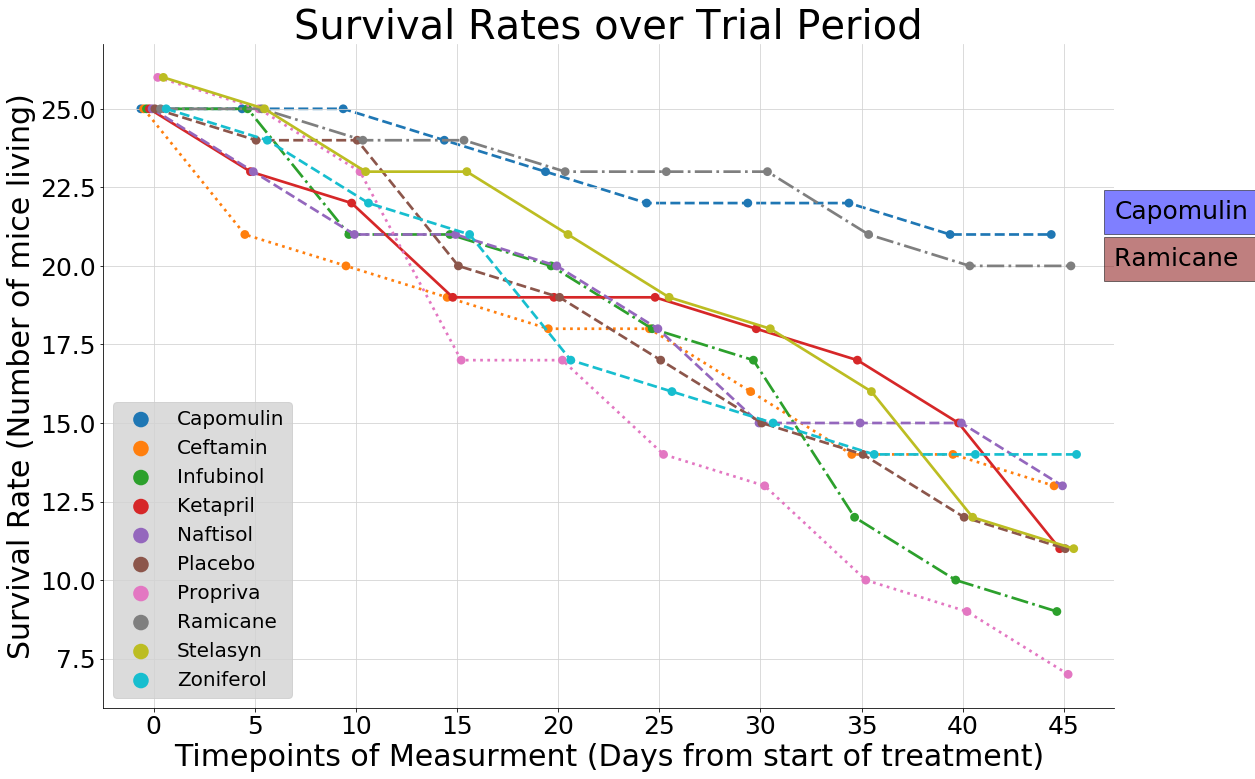

In [13]:
g1 = sns.factorplot(x='Timepoint',
                    y='Mouse ID',
                    hue='Drug',
                    data=survival_rate,
                    size=10,
                    aspect=1.5,
                    ci=95,
                    n_boot=10000,
                    legend=False,
                    errwidth=3,
                    capsize=.05,
                    dodge=True,
                    linestyles=['--',':','-.','-','--','--',':','-.','-','--']
                   )
ax1 = g1.ax

ax1.text(9.5,21.5, 'Capomulin', bbox=dict(facecolor='blue', alpha=.5)).set_fontsize(25)
ax1.text(9.5,20, 'Ramicane ', bbox=dict(facecolor='maroon', alpha=.5)).set_fontsize(25)

ax1.legend(loc='lower left', fontsize=20, markerscale=2, frameon=True, facecolor='lightgrey')
ax1.set_title('Survival Rates over Trial Period').set_fontsize(40)
ax1.grid(color='lightgrey')
ax1.set_xlabel('Timepoints of Measurment (Days from start of treatment)').set_fontsize(30)
ax1.set_ylabel('Survival Rate (Number of mice living)').set_fontsize(30)
ax1.tick_params(which='major', labelsize=25)
ax1.set_facecolor("white")
g1.savefig('survival_rate.png')

In [14]:
# selects out the t=0 and t=45 data 
t_indexed_df = drug_response_df.set_index('Timepoint')
t_filtered_df = t_indexed_df.loc[[0, 45],:]
# slices data frame for drug, id, and volume.
t_filtered_df = t_filtered_df.loc[:,['Drug', 'Mouse ID', 'Tumor Volume (mm3)']]

# groups by drug and id and counts to determine if mouse survived or not
# 2-survived 1-did not survive.  
t_grouped = t_filtered_df.groupby(['Drug', 'Mouse ID']).count() 
t_grouped.reset_index(inplace=True)
#creates an index of the animals that survived
a= t_grouped[t_grouped['Tumor Volume (mm3)'] == 2]
a=a['Mouse ID'].to_frame().values
a = [x[0] for x in a]

# selects out only animals that survived
t_filtered_df.set_index('Mouse ID', inplace=True)
t_survived = t_filtered_df.loc[a,:]
t_survived.reset_index(inplace=True)

# My least readable code ever calculates the percent change of the tumor volume at t=0 and t=45
t_pdif = list(map(lambda vals: 100*(vals[1]-vals[0])/vals[0],
                  t_survived.groupby(['Drug', 'Mouse ID'],sort=False).pipe(
                  lambda x : list(map(lambda b: list(map(
                      lambda y : y,b[1]['Tumor Volume (mm3)'])), x)))))

# puts percent changes into dataframe and combines with mouse id and Drug columns
t_pdif = pd.DataFrame(t_pdif,columns=['Percent Tumor Change'])
t_survived.drop_duplicates('Mouse ID', inplace=True)
t_survived.drop('Tumor Volume (mm3)', axis=1,inplace=True)
t_survived.reset_index(drop=True, inplace=True)
t_pdif = pd.concat([t_pdif, t_survived],axis=1)

# calculates average percent change for each drug
avg_t_pdif = t_pdif.groupby('Drug').mean()
avg_t_pdif.reset_index(inplace=True)
avg_t_pdif

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Drug,Percent Tumor Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,40.905441
7,Ramicane,-18.507693
8,Stelasyn,42.007501
9,Zoniferol,45.503294


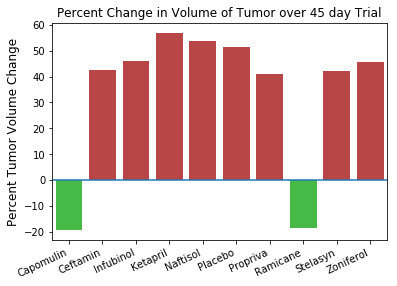

In [46]:
hue = list(map(lambda x: (0,1,0,.5) if x<0 else (1,0,0,.5), avg_t_pdif['Percent Tumor Change']))
h= sns.color_palette(palette=hue)
ax4=plt.subplot()
g4 = sns.barplot(x='Drug',
                 y='Percent Tumor Change',
                 data=avg_t_pdif,
                 palette=h,
                 ci=None,
                 orient='v',
                 saturation=.45,
                )

g4.set_xticklabels(g4.get_xticklabels(),fontsize=10, rotation=25, horizontalalignment='right')
ax4.set_title('Percent Change in Volume of Tumor over 45 day Trial').set_fontsize(12)
ax4.set_xlabel('')
ax4.set_ylabel('Percent Tumor Volume Change').set_fontsize(12)
ax4.axhline()
plt.savefig('percent_delta_volume.png', orientation='portrate', format='png', box_inches='tight', pad_inches=5)